## 5. Building functionality

In [105]:
gal_bldg_func = BuildingFunctionality(client)
    
gal_bldg_func.set_input_dataset("building_damage_mcs_samples", gal_bldg_damage_mcs_samples)
gal_bldg_func.set_input_dataset("poles_damage_mcs_samples", gal_pole_damage_mcs_samples)
gal_bldg_func.load_remote_input_dataset("interdependency_dictionary", "63e5af0262d82d2f5a1058ea")

gal_bldg_func.set_parameter("result_name", "gal_mcs_functionality_probability")
gal_bldg_func.run_analysis()

gal_bldg_func_samples_df = gal_bldg_func.get_output_dataset('functionality_samples').get_dataframe_from_csv()
gal_bldg_func_samples_df.head()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


building_guid              samples
0  f3a21b5f-0334-4d77-911f-faa9a45c92d7  1,1,0,1,1,1,1,1,1,0
1  80ab0289-8c72-4699-b12b-08ef2f2a5c91  0,0,0,0,0,0,0,0,0,0
2  7916eaa8-0bfa-4b32-84ff-20f19a520f5c  1,0,1,1,1,1,1,1,1,0
3  79008971-a534-4e45-9e40-43a2a904e59b  0,1,0,0,0,0,0,1,0,0
4  2ad8ab6f-057f-468e-9911-6e92d9d4d01f  1,1,0,1,1,1,1,0,1,0

In [106]:
df_gal_bldg_func_probability = gal_bldg_func.get_output_dataset('functionality_probability').get_dataframe_from_csv()
df_gal_bldg_func_probability = df_gal_bldg_func_probability.rename(columns={"building_guid": "guid"})
func_prob_target = 0.50
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'].isna(), 'functionality'] = 1 # Assumed to be connected to an undamaged/unanalyzed power network for now.
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'] <= func_prob_target, 'functionality'] = 0 # Non-Functional
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'] > func_prob_target, 'functionality'] = 1 # Functional
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'].isna(), 'functionality_state'] = 'Functional' # Assumed to be connected to an undamaged/unanalyzed power network for now.
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'] <= func_prob_target, 'functionality_state'] = 'Non-Functional' # Non-Functional
df_gal_bldg_func_probability.loc[df_gal_bldg_func_probability['probability'] > func_prob_target, 'functionality_state'] = 'Functional' # Functional
df_gal_bldg_func_probability.head()


guid  probability  functionality  \
0  f3a21b5f-0334-4d77-911f-faa9a45c92d7          0.8            1.0   
1  80ab0289-8c72-4699-b12b-08ef2f2a5c91          0.0            0.0   
2  7916eaa8-0bfa-4b32-84ff-20f19a520f5c          0.8            1.0   
3  79008971-a534-4e45-9e40-43a2a904e59b          0.2            0.0   
4  2ad8ab6f-057f-468e-9911-6e92d9d4d01f          0.7            1.0   

  functionality_state  
0          Functional  
1      Non-Functional  
2          Functional  
3      Non-Functional  
4          Functional

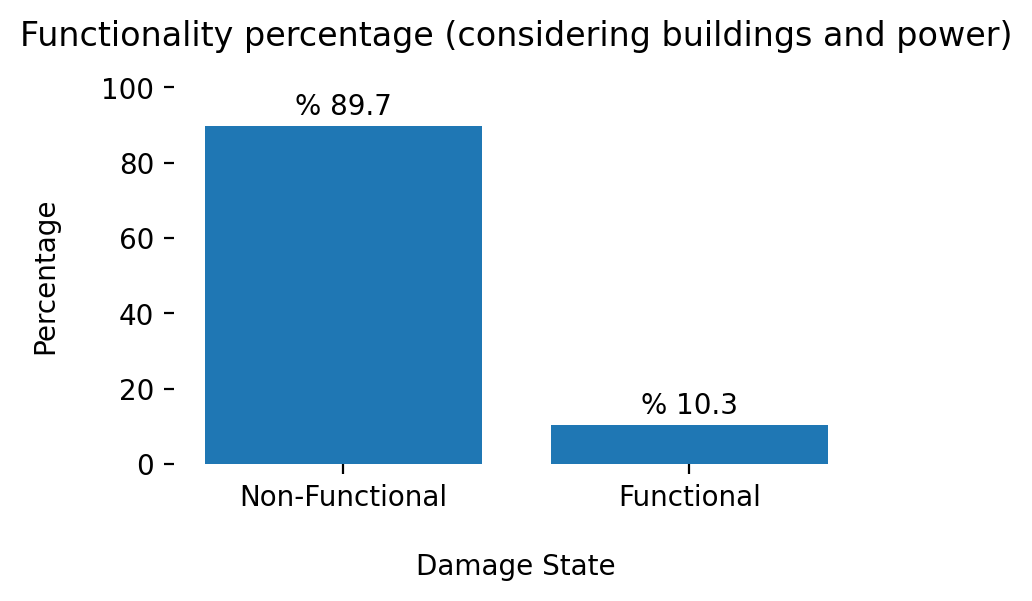

In [108]:
### Plot of the distribution of functionality state for buildings
indexes = df_gal_bldg_func_probability['functionality_state'].value_counts(normalize=True).mul(100).index.tolist()
values = df_gal_bldg_func_probability['functionality_state'].value_counts(normalize=True).mul(100).tolist()

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=200)

bars = ax.bar(x=indexes, height=values,)

for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 3,f'% {bar.get_height() :.1f}',
            horizontalalignment='center')

fig.tight_layout()
ax.set_ylim([0,100])
ax.set_xlabel('Damage State', labelpad=15)
ax.set_ylabel('Percentage', labelpad=15)
ax.set_title('Functionality percentage (considering buildings and power)', pad=15)
ax.set(frame_on=False);